The notebook uses the ensemble of 6 CNN (inspired by  https://www.kaggle.com/mohammedmurtuzalabib/mnist-ensemble-of-5-cnns-0-99742).

There are 3 pairs of 2 CNN of the same architecture.
For the ensemble i chose 3 CNN architecture from Kaggle which give the best score (and augmented some of them with BatchNormalization layers).
Comparament of the ensemble and single CNNs quality is presented.


<h1>MNIST_Recognizer_CNN<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-libraries" data-toc-modified-id="Importing-libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importing libraries</a></span></li><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Preparation</a></span><ul class="toc-item"><li><span><a href="#Load-data" data-toc-modified-id="Load-data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Load data</a></span></li><li><span><a href="#Split-into-Target-and-Features" data-toc-modified-id="Split-into-Target-and-Features-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Split into Target and Features</a></span></li><li><span><a href="#Check-for-null-and-missing-values" data-toc-modified-id="Check-for-null-and-missing-values-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Check for null and missing values</a></span></li><li><span><a href="#Normalize-data" data-toc-modified-id="Normalize-data-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Normalize data</a></span></li><li><span><a href="#Reshape" data-toc-modified-id="Reshape-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Reshape</a></span></li><li><span><a href="#Encode-target" data-toc-modified-id="Encode-target-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Encode target</a></span></li><li><span><a href="#Split-into-train-and-validation-set" data-toc-modified-id="Split-into-train-and-validation-set-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Split into train and validation set</a></span></li></ul></li><li><span><a href="#Modeling-(Ensemble-of-6-CNN)" data-toc-modified-id="Modeling-(Ensemble-of-6-CNN)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modeling (Ensemble of 6 CNN)</a></span><ul class="toc-item"><li><span><a href="#Define-the-model-CNN_1" data-toc-modified-id="Define-the-model-CNN_1-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Define the model CNN_1</a></span></li><li><span><a href="#Define-the-model-CNN_2" data-toc-modified-id="Define-the-model-CNN_2-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Define the model CNN_2</a></span></li><li><span><a href="#Define-the-model-CNN_3" data-toc-modified-id="Define-the-model-CNN_3-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Define the model CNN_3</a></span></li><li><span><a href="#Define-the-model-CNN_4" data-toc-modified-id="Define-the-model-CNN_4-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Define the model CNN_4</a></span></li><li><span><a href="#Define-the-model-CNN_5" data-toc-modified-id="Define-the-model-CNN_5-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Define the model CNN_5</a></span></li><li><span><a href="#Define-the-model-CNN_6" data-toc-modified-id="Define-the-model-CNN_6-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Define the model CNN_6</a></span></li><li><span><a href="#Data-augmentation" data-toc-modified-id="Data-augmentation-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Data augmentation</a></span></li></ul></li><li><span><a href="#Evaluation" data-toc-modified-id="Evaluation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Evaluation</a></span><ul class="toc-item"><li><span><a href="#Training-and-validation-curves" data-toc-modified-id="Training-and-validation-curves-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Training and validation curves</a></span></li></ul></li><li><span><a href="#Prediction" data-toc-modified-id="Prediction-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Prediction</a></span></li></ul></div>

# Importing libraries

In [1]:
#Basic 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

%matplotlib inline
sns.set(style='white', context='notebook', palette='deep')

np.random.seed(9)

In [2]:
#Specific

import matplotlib.image as mpimg
from sklearn.metrics import confusion_matrix
import itertools

import tensorflow as tf

from keras.utils.np_utils import to_categorical #convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import LearningRateScheduler


In [3]:
#GPU testing 

if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")
print(tf.test.is_built_with_cuda())

Default GPU Device: /device:GPU:0
True


# Data Preparation 

## Load data 

In [4]:
train=pd.read_csv('../input/digit-recognizer/train.csv')
test=pd.read_csv('../input/digit-recognizer/test.csv')

## Split into Target and Features

In [5]:
y_train=train['label']
X_train=train.drop(columns='label')

In [6]:
# free some space
del train 

Check balance in the target varible

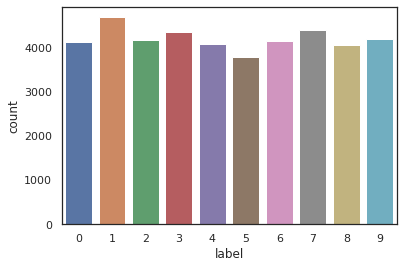

In [7]:
sns.countplot(y_train)

The dataset is balanced

## Check for null and missing values

In [8]:
X_train.isna().any().sum()

0

In [9]:
test.isna().any().sum()

0

## Normalize data

In [10]:
X_train /=255.0
test /=255.0

## Reshape

In [11]:
X_train=X_train.values.reshape(-1,28,28,1)
test=test.values.reshape(-1,28,28,1)

## Encode target

In [12]:
#Cross-entropy loss needs OHE for target
y_train=to_categorical(y_train,num_classes=10)

## Split into train and validation set

In [13]:
#X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size = 0.25, random_state=2)

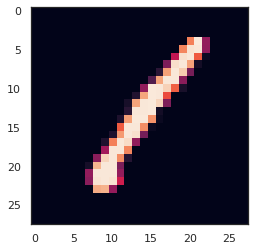

In [14]:
plt.imshow(X_train[0][:,:,0])

In [15]:
X_train.shape

(42000, 28, 28, 1)

# Modeling (Ensemble of 6 CNN)

In [16]:
nets=6
model=[0]*nets
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0) 


## Define the model CNN_1

In [17]:
#Sequential model
model[0]=Sequential()

# 2 convolutional layers with 32 filters, 1 subsampling layer, 1 regularization layer
model[0].add(Conv2D(filters=32,kernel_size=(5,5),padding='Same',activation='relu',input_shape=(28,28,1)))
model[0].add(Conv2D(filters=32,kernel_size=(5,5),padding='Same',activation='relu',input_shape=(28,28,1)))
model[0].add(MaxPool2D(pool_size=(2,2)))
model[0].add(Dropout(0.25))

# 2 convolutional layers with 64 filters, 1 subsampling layer, 1 regularization layer
model[0].add(Conv2D(filters=64,kernel_size=(3,3),padding='Same',activation='relu',input_shape=(28,28,1)))
model[0].add(Conv2D(filters=64,kernel_size=(3,3),padding='Same',activation='relu',input_shape=(28,28,1)))
model[0].add(MaxPool2D(pool_size=(2,2)))
model[0].add(Dropout(0.25))

#Classification layers
model[0].add(Flatten())  #Full conected layer needs 1D array on input
model[0].add(Dense(256,activation='relu'))
model[0].add(Dropout(0.5))
model[0].add(Dense(10,activation='softmax'))

model[0].compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=['accuracy'] )

## Define the model CNN_2 

In [18]:
model[1]=Sequential()

# 2 convolutional layers with 32 filters, 1 subsampling layer, 1 regularization layer
model[1].add(Conv2D(filters=32,kernel_size=(5,5),padding='Same',activation='relu',input_shape=(28,28,1)))
model[1].add(Conv2D(filters=32,kernel_size=(5,5),padding='Same',activation='relu',input_shape=(28,28,1)))
model[1].add(MaxPool2D(pool_size=(2,2)))
model[1].add(Dropout(0.25))

# 2 convolutional layers with 64 filters, 1 subsampling layer, 1 regularization layer
model[1].add(Conv2D(filters=64,kernel_size=(3,3),padding='Same',activation='relu',input_shape=(28,28,1)))
model[1].add(Conv2D(filters=64,kernel_size=(3,3),padding='Same',activation='relu',input_shape=(28,28,1)))
model[1].add(MaxPool2D(pool_size=(2,2)))
model[1].add(Dropout(0.25))

#Classification layers
model[1].add(Flatten())  #Full conected layer needs 1D array on input
model[1].add(Dense(256,activation='relu'))
model[1].add(Dropout(0.5))
model[1].add(Dense(10,activation='softmax'))

model[1].compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=['accuracy'] )

## Define the model CNN_3

In [19]:
#Sequential model
model[2]=Sequential()

# 2 convolutional layers, BatchNormalization, 1 subsampling layer, 1 regularization layer
model[2].add(Conv2D(filters=32,kernel_size=(5,5),padding='Same',activation='relu',input_shape=(28,28,1)))
model[2].add(BatchNormalization())
model[2].add(Conv2D(filters=32,kernel_size=(5,5),padding='Same',activation='relu',input_shape=(28,28,1)))
model[2].add(BatchNormalization())
model[2].add(MaxPool2D(pool_size=(2,2)))
model[2].add(Dropout(0.25))

# 2 convolutional layers with 64 filters, BatchNormalization, 1 subsampling layer, 1 regularization layer
model[2].add(Conv2D(filters=64,kernel_size=(3,3),padding='Same',activation='relu',input_shape=(28,28,1)))
model[2].add(BatchNormalization())
model[2].add(Conv2D(filters=64,kernel_size=(3,3),padding='Same',activation='relu',input_shape=(28,28,1)))
model[2].add(BatchNormalization())
model[2].add(MaxPool2D(pool_size=(2,2)))
model[2].add(Dropout(0.25))

#Classification layers
model[2].add(Flatten())  #Full conected layer needs 1D array on input
model[2].add(Dense(256,activation='relu'))
model[2].add(BatchNormalization())
model[2].add(Dropout(0.5))
model[2].add(Dense(10,activation='softmax'))

model[2].compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=['accuracy'] )

## Define the model CNN_4


In [20]:
#Sequential model
model[3]=Sequential()

# 2 convolutional layers, BatchNormalization, 1 subsampling layer, 1 regularization layer
model[3].add(Conv2D(filters=32,kernel_size=(5,5),padding='Same',activation='relu',input_shape=(28,28,1)))
model[3].add(BatchNormalization())
model[3].add(Conv2D(filters=32,kernel_size=(5,5),padding='Same',activation='relu',input_shape=(28,28,1)))
model[3].add(BatchNormalization())
model[3].add(MaxPool2D(pool_size=(2,2)))
model[3].add(Dropout(0.25))

# 2 convolutional layers with 64 filters, BatchNormalization, 1 subsampling layer, 1 regularization layer
model[3].add(Conv2D(filters=64,kernel_size=(3,3),padding='Same',activation='relu',input_shape=(28,28,1)))
model[3].add(BatchNormalization())
model[3].add(Conv2D(filters=64,kernel_size=(3,3),padding='Same',activation='relu',input_shape=(28,28,1)))
model[3].add(BatchNormalization())
model[3].add(MaxPool2D(pool_size=(2,2)))
model[3].add(Dropout(0.25))

#Classification layers
model[3].add(Flatten())  #Full conected layer needs 1D array on input
model[3].add(Dense(256,activation='relu'))
model[3].add(BatchNormalization())
model[3].add(Dropout(0.5))
model[3].add(Dense(10,activation='softmax'))

model[3].compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=['accuracy'] )

 ## Define the model CNN_5


In [21]:
#Sequential model
model[4]=Sequential()

model[4].add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1)))
model[4].add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model[4].add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model[4].add(MaxPool2D(pool_size=2))
model[4].add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model[4].add(Conv2D(filters=192, kernel_size=3, padding='same', activation='relu'))
model[4].add(MaxPool2D(pool_size=2))
model[4].add(Conv2D(filters=192, kernel_size=5, padding='same', activation='relu'))
model[4].add(MaxPool2D(pool_size=2, padding='same'))
model[4].add(Flatten())
model[4].add(Dense(256, activation='relu'))
model[4].add(Dense(10, activation='softmax'))

model[4].compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=['accuracy'] )

## Define the model CNN_6

In [22]:
#Sequential model
model[5]=Sequential()

model[5].add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1)))
model[5].add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model[5].add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model[5].add(MaxPool2D(pool_size=2))
model[5].add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model[5].add(Conv2D(filters=192, kernel_size=3, padding='same', activation='relu'))
model[5].add(MaxPool2D(pool_size=2))
model[5].add(Conv2D(filters=192, kernel_size=5, padding='same', activation='relu'))
model[5].add(MaxPool2D(pool_size=2, padding='same'))
model[5].add(Flatten())
model[5].add(Dense(256, activation='relu'))
model[5].add(Dense(10, activation='softmax'))

model[5].compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=['accuracy'] )

## Data augmentation

In [23]:
# With data augmentation to prevent overfitting:
datagen = ImageDataGenerator(
          featurewise_center=False,            # set input mean to 0 over the dataset
          samplewise_center=False,             # set each sample mean to 0
          featurewise_std_normalization=False, # divide inputs by std of the dataset
          samplewise_std_normalization=False,  # divide each input by its std
          zca_whitening=False,                 # apply ZCA whitening
          rotation_range=10,                   # randomly rotate images in the range (degrees, 0 to 180)
          zoom_range = 0.1,                    # Randomly zoom image 
          width_shift_range=0.1,               # randomly shift images horizontally (fraction of total width)
          height_shift_range=0.1,              # randomly shift images vertically (fraction of total height)
          horizontal_flip=False,               # randomly flip images
          vertical_flip=False)                 # randomly flip images

datagen.fit(X_train)

In [24]:
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)

In [25]:
history = [0] * nets

## Train the network

In [26]:
epochs = 20
for j in range(nets):
    print("CNN ",j+1)
    X_train2, X_val2, Y_train2, Y_val2 = train_test_split(X_train, y_train, test_size = 0.1)
    history[j] = model[j].fit_generator(datagen.flow(X_train2,Y_train2, batch_size=32),
        epochs = epochs, steps_per_epoch = X_train2.shape[0]//32,  
        validation_data = (X_val2,Y_val2), callbacks=[annealer], verbose=1)
    print("CNN {0:d}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        j+1,epochs,max(history[j].history['accuracy']),max(history[j].history['val_accuracy']) ))

CNN  1
Epoch 1/20
1181/1181 [==============================] - 16s 14ms/step - loss: 0.3180 - accuracy: 0.8994 - val_loss: 0.0688 - val_accuracy: 0.9795 - lr: 0.0010
Epoch 2/20
1181/1181 [==============================] - 16s 14ms/step - loss: 0.1134 - accuracy: 0.9675 - val_loss: 0.0465 - val_accuracy: 0.9848 - lr: 9.5000e-04
Epoch 3/20
1181/1181 [==============================] - 17s 14ms/step - loss: 0.0920 - accuracy: 0.9734 - val_loss: 0.0341 - val_accuracy: 0.9893 - lr: 9.0250e-04
Epoch 4/20
1181/1181 [==============================] - 16s 13ms/step - loss: 0.0902 - accuracy: 0.9754 - val_loss: 0.0254 - val_accuracy: 0.9910 - lr: 8.5737e-04
Epoch 5/20
1181/1181 [==============================] - 16s 14ms/step - loss: 0.0839 - accuracy: 0.9770 - val_loss: 0.0288 - val_accuracy: 0.9912 - lr: 8.1451e-04
Epoch 6/20
1181/1181 [==============================] - 17s 14ms/step - loss: 0.0852 - accuracy: 0.9773 - val_loss: 0.0417 - val_accuracy: 0.9902 - lr: 7.7378e-04
Epoch 7/20
1181/118

In [27]:
data={'CNN1':[history[0].history['val_accuracy'][19]],'CNN2':[history[1].history['val_accuracy'][19]],'CNN3':[history[2].history['val_accuracy'][19]],'CNN4':[history[3].history['val_accuracy'][19]],'CNN5':[history[4].history['val_accuracy'][19]],'CNN6':[history[5].history['val_accuracy'][19]]}

histories=pd.Series(data)
                                
histories

CNN1     [0.991428554058075]
CNN2    [0.9895238280296326]
CNN3    [0.9940476417541504]
CNN4    [0.9957143068313599]
CNN5    [0.9852380752563477]
CNN6    [0.9788095355033875]
dtype: object

In [28]:
#make the ensemble prediction on the validation set
results_ens = np.zeros( (X_val2.shape[0],10) ) 
for j in range(nets):
    results_ens = results_ens + model[j].predict(X_val2)
results_ens = np.argmax(results_ens,axis =1)

In [29]:
#get the score of the ensemble prediction
from sklearn.metrics import accuracy_score

Y_val2=np.argmax(Y_val2,axis =1)
ens_acc=accuracy_score(results_ens,Y_val2)


In [30]:
print('Ensemble accuracy: {:.4f}'.format (ens_acc))

Ensemble accuracy: 0.9964


# Evaluation 

## Training and validation curves

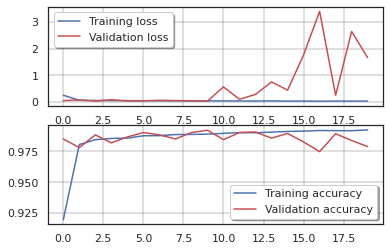

In [31]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history[5].history['loss'], color='b', label="Training loss")
ax[0].plot(history[5].history['val_loss'], color='r', label="Validation loss",axes =ax[0])
ax[0].grid(color='black', linestyle='-', linewidth=0.25)
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history[5].history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history[5].history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].grid(color='black', linestyle='-', linewidth=0.25)
legend = ax[1].legend(loc='best', shadow=True)

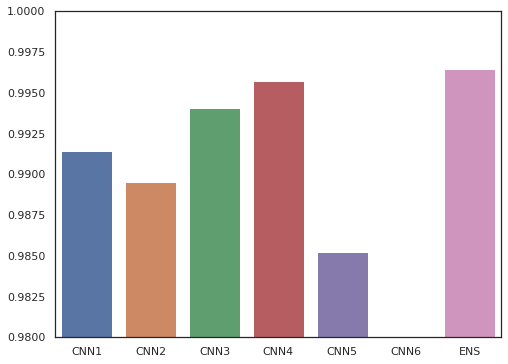

In [32]:
#Vizualization of single CNNs and the ensemble accuracy on validation set 
accs=[]
for i in range (nets):
    accs.append(history[i].history['val_accuracy'][19])
                 
accs.append(ens_acc)
cnns=['CNN1','CNN2','CNN3','CNN4','CNN5','CNN6','ENS']

fig,ax=plt.subplots(figsize=(8,6))
ax=sns.barplot(x=cnns,y=accs)
ax.set(ylim=(0.98, 1.0))

plt.show()

We can see that 3rd anf 4th CNN give the best quality. These nets are stolen from https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6 and augmented with BatchNormalization layers.

# Prediction

In [33]:
#predict the labels of the test 
results = np.zeros( (test.shape[0],10) ) 
for j in range(nets):
    results = results + model[j].predict(test)
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)
submission.to_csv("predictions.csv",index=False)

<font size=5 color="red">Thank you for your attention! If you find this notebook useful, please, VOTE for it!!!</font>
